# Загрузка и общий взгляд на данные

In [ ]:
# Импорты ко всем заданиям (кроме рубежки и зачёта, там все указаны)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

df = pd.read_csv(FILENAME)
df_test = pd.read_csv(TEST_FILENAME)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
print("NaN in age column:", df['Age'].isna().sum())

NaN in age column: 177


<Axes: ylabel='Survived'>

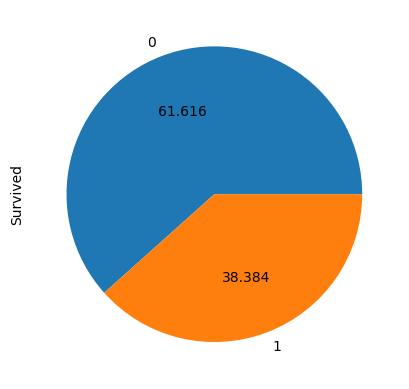

In [ ]:
df["Survived"].value_counts().plot.pie(autopct='%.3f')

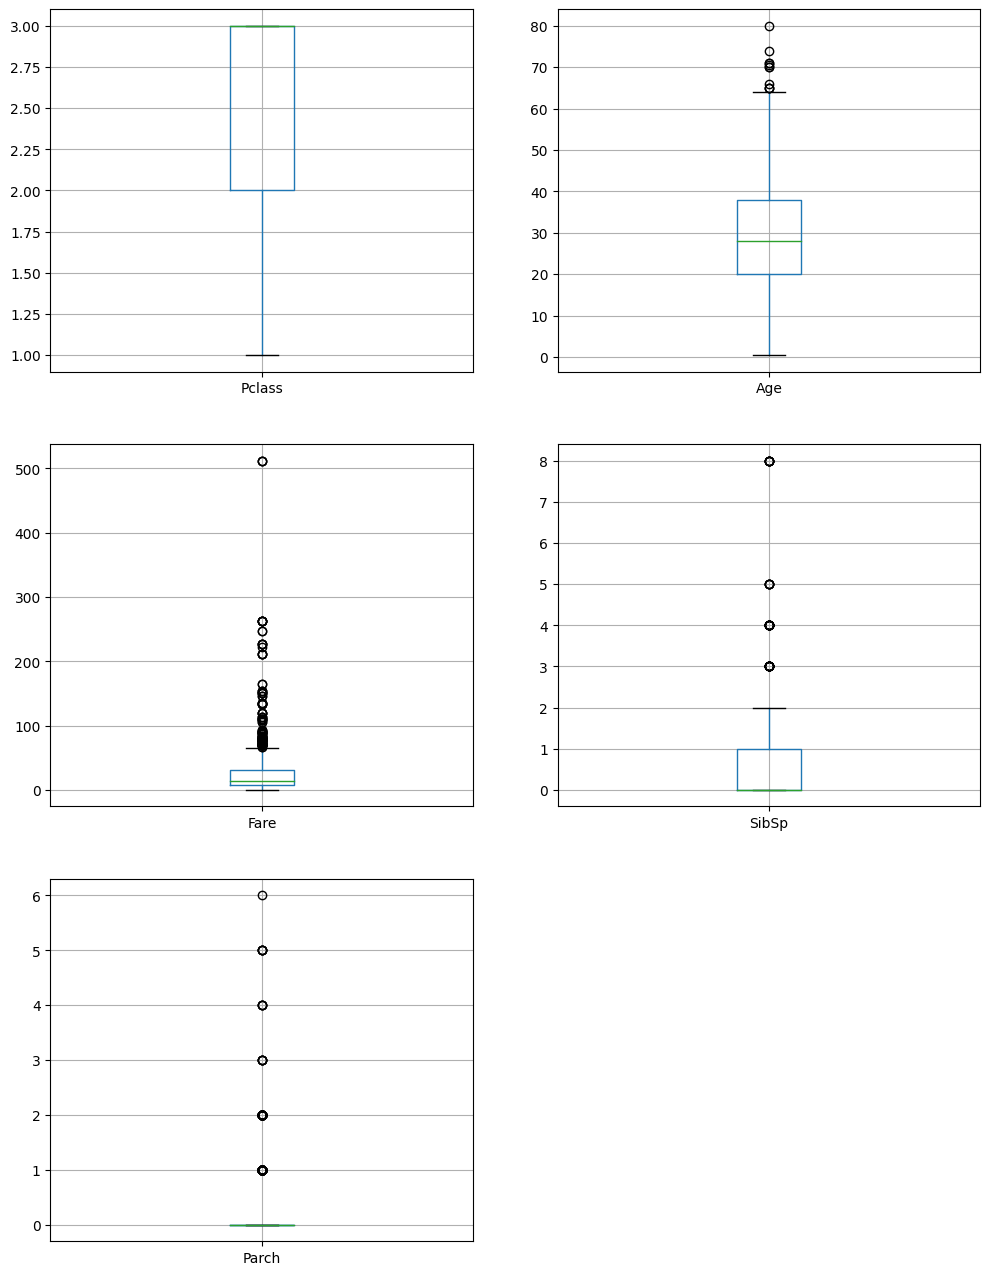

In [ ]:
columns = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 16))

for i, col in enumerate(columns):
    plt.subplot(3, 2, i + 1)

    df.boxplot(column=col)

# Предобработка

In [ ]:
print("Prepare data")

nan_counts = df.isna().sum()
to_remove = list(nan_counts[nan_counts > df.shape[0] / 3].index) + ['Ticket', 'PassengerId']

def quick_data_prepare(data):
    data = data.drop(to_remove, axis=1)

    print("Remove columns:", to_remove)

    data['FamSize'] = data['SibSp'] + data['Parch']
    data = data.drop(['SibSp', 'Parch'], axis=1)

    print("Replace columns SibSp and Parch on FamSize (sibsp + parch)")

    return data

df = quick_data_prepare(df)
df_test = quick_data_prepare(df_test)

df.head()

Prepare data
Remove columns: ['Cabin', 'Ticket', 'PassengerId']
Replace columns SibSp and Parch on FamSize (sibsp + parch)
Remove columns: ['Cabin', 'Ticket', 'PassengerId']
Replace columns SibSp and Parch on FamSize (sibsp + parch)


,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamSize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


In [ ]:
def find_honorific(name):
    return name.split(', ')[1].split('.')[0].split()[-1]

def create_honorific(data):
    data['honorific'] = data['Name'].apply(find_honorific)

    data['honorific'] = data['honorific'].replace(
        ['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt', 'Sir', 'Jonkheer'], 'Mr'
    )
    data['honorific'] = data['honorific'].replace(
        ['Dona', 'Countess', 'Mme'], 'Mrs'
    )
    data['honorific'] = data['honorific'].replace(
        ['Mlle', 'Ms', 'Lady'], 'Miss'
    )

    data = data.drop('Name', axis=1)
    return data

df = create_honorific(df)
df_test = create_honorific(df_test)

print("Unique honorifics:", df['honorific'].unique())

df.head()

Unique honorifics: ['Mr' 'Mrs' 'Miss' 'Master']


,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize,honorific
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


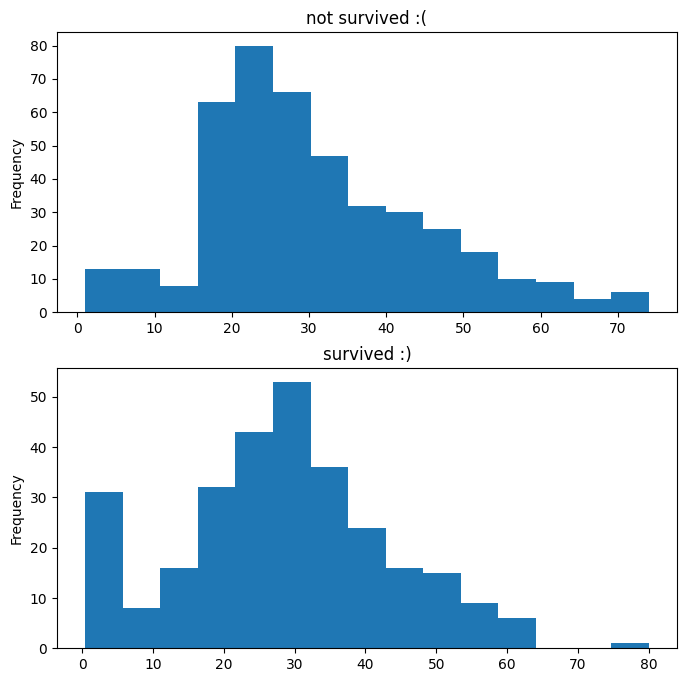

In [ ]:
plt.figure(figsize=(8, 8))
titles = ['not survived :(', 'survived :)']

for i in range(2):
    plt.subplot(2, 1, i + 1)

    plt.title(titles[i])
    df[df['Survived'] == i]['Age'].plot.hist(bins=15)


In [ ]:
def update_age(df):
    df_mean_age = df.groupby('honorific')['Age'].mean()

    for honorific in df_mean_age.index:
        cur_df_nan_age = (df['honorific'] == honorific) & df['Age'].isna()
        df['Age'].loc[cur_df_nan_age] = df_mean_age[honorific]

    return df


df = update_age(df)
df_test = update_age(df_test)

print("Age Nan:", df['Age'].isna().sum())

df.head()

Age Nan: 0


<ipython-input-97-accf39aaeff7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].loc[cur_df_nan_age] = df_mean_age[honorific]
<ipython-input-97-accf39aaeff7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].loc[cur_df_nan_age] = df_mean_age[honorific]


,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize,honorific
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [ ]:
labels = df['Survived']
df = pd.get_dummies(df.drop('Survived', axis=1), drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

df_test.head()

,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,honorific_Miss,honorific_Mr,honorific_Mrs
0,3,34.5,7.8292,0,1,1,0,0,1,0
1,3,47.0,7.0000,1,0,0,1,0,0,1
2,2,62.0,9.6875,0,1,1,0,0,1,0
3,3,27.0,8.6625,0,1,0,1,0,1,0
4,3,22.0,12.2875,2,0,0,1,0,0,1


# Обучаем

In [ ]:
from pandas import DataFrame

class Normalise:
    def __init__(self, standart: bool = True):
        self.coefs = None
        self.standart = standart

    def fit_transform(self, data: DataFrame):
        self.fit(data)
        return self.transform(data)

    def fit(self, data: DataFrame):
        if self.standart:
            self.coefs = pd.concat({"mean": data.mean(), "std": data.std()}, axis = 1)
        else:  # Min-Max
            self.coefs = pd.concat({"min": data.min(), "max": data.max()}, axis = 1)

    def transform(self, data: DataFrame):
        if self.coefs is None:
            raise Exception("Can't transform without train")

        if set(data.columns) ^ set(self.coefs.index):
            raise Exception("Columns of data not matching train data!")

        if self.standart:
            return (data - self.coefs['mean']) / self.coefs['std']
        else:
            return (data - self.coefs['min']) / (self.coefs['max'] - self.coefs['min'])

    def restore(self, data: DataFrame):
        if self.coefs is None:
            raise Exception("Can't restore without train")

        rest_df = DataFrame()

        for col in data.columns:
            coef = self.coefs.iloc[col]

            if self.standart:
                rest_df[col] = data[col] * coef['std'] + coef['mean']
            else:
                rest_df[col] = data[col] * (self.coefs['max'] - self.coefs['min']) + coef['min']

        return rest_df

In [ ]:
scaler = Normalise(standart = False)
df_norm = scaler.fit_transform(df)
df_test_norm = scaler.transform(df_test)

df_norm.head()

,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,honorific_Miss,honorific_Mr,honorific_Mrs
0,1.0,0.271174,0.014151,0.1,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472229,0.139136,0.1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.321438,0.015469,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.434531,0.103644,0.1,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.434531,0.015713,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
def train_test_split(data, labels, train_size=0.8, shuffle=True, random_state=None):
    assert data.shape[0] == labels.shape[0]

    sz = data.shape[0]

    if shuffle:
        perm = np.random.default_rng(seed=random_state).permutation(sz)
        data = data[perm]
        labels = labels[perm]

    if 0 < train_size < 1:
        train_size = int(train_size * sz)

    return data[:train_size], data[train_size:], labels[:train_size], labels[train_size:]

In [ ]:
class Utils:
    @staticmethod
    def prepare_data(data):
        if isinstance(data, DataFrame):
            data = data.to_numpy()
        if len(data.shape) < 2:
            data = np.expand_dims(data, -1)
        return data

    @staticmethod
    def sigmoid_function(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def loss(yp, y):
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()


class LogisticRegression:
    def __init__(self, newton: bool = False):
        self.weights = None
        self.intercept = None
        self.newton = newton

    def fit(self, data, labels, learning_rate=0.01, epochs=100, verbose: bool = False):
        assert data.shape[0] == labels.shape[0]

        data = Utils.prepare_data(data)
        labels = Utils.prepare_data(labels)

        self.weights = np.random.normal(-1, 1, (data.shape[1], 1))
        # self.weights = np.zeros((data.shape[1], 1))
        self.intercept = np.random.rand(1)
        # self.intercept = np.zeros(1)

        train_size = data.shape[0]

        for i in range(epochs):
            predicted = self.predict(data)

            diff = predicted - labels
            dcost_dm = np.dot(data.T, diff) * 2 / train_size
            dcost_dc = diff.sum() * 2 / train_size

            if not self.newton:
                self.weights -= learning_rate * dcost_dm
                self.intercept -= learning_rate * dcost_dc
            else:
                #hessian = np.dot(data.T, ((predicted * (1 - predicted)) * data)) / train_size
                hessian = np.dot(data.T, np.diag((predicted * (1 - predicted))[:, 0])).dot(data)
                # print(hessian.shape, dcost_dm.shape)
                self.weights -= np.dot(np.linalg.inv(hessian), dcost_dm)
                self.intercept -= dcost_dc

            if verbose or i % 10 == 0 or i == epochs - 1:
                print(f"Epoch {i + 1}: loss {Utils.loss(predicted, labels):.4f}")

        return self.weights, self.intercept

    def predict(self, data, prob: bool = True):
        if self.weights is None or self.intercept is None:
            raise Exception("Can't predict without train!")

        data = Utils.prepare_data(data)

        res = Utils.sigmoid_function(
            np.dot(data, self.weights) + self.intercept
        )

        return res if prob else np.rint(res)

In [ ]:
class Metrics:
    @staticmethod
    def confusion_matrix(y_true, y_pred, threshold: float = 0.5):
        """
        Computes the confusion matrix of a classification model.

        Args:
            y_true (numpy array): A numpy array of true labels for each data point.
            y_pred (numpy array): A numpy array of predictions for each data point.
            threshold (float): threshold for cosidering prediction class
        Returns:
            ndarray: Confusion matrix 2x2
        """

        if isinstance(y_true, pd.Series):
            y_true = y_true.to_numpy().flatten()
        if isinstance(y_pred, pd.Series):
            y_pred = y_pred.to_numpy().flatten()

        matrix = [
            [
                np.sum(y_pred[y_true == 0] < threshold), # True Negative
                np.sum(y_pred[y_true == 0] >= threshold)  # False Poitive
            ],
            [
                np.sum(y_pred[y_true == 1] < threshold), # False Negative
                np.sum(y_pred[y_true == 1] >= threshold)  # True Positive
            ]
        ]

        return np.array(matrix)

    @staticmethod
    def accuracy(y_true, y_pred, threshold: float = 0.5):
        c_m = Metrics.confusion_matrix(y_true, y_pred, threshold)
        return (c_m[0, 0] + c_m[1, 1]) / np.sum(c_m)

    @staticmethod
    def percision(y_true, y_pred, threshold: float = 0.5):
        c_m = Metrics.confusion_matrix(y_true, y_pred, threshold)
        return c_m[1, 1] / (c_m[1, 1] + c_m[0, 1]) # TP / (TP + FP)

    @staticmethod
    def recall(y_true, y_pred, threshold: float = 0.5):
        c_m = Metrics.confusion_matrix(y_true, y_pred, threshold)
        return c_m[1, 1] / (c_m[1, 1] + c_m[1, 0]) # TP / (TP + FN)

    @staticmethod
    def fp_rate(y_true, y_pred, threshold: float = 0.5):
        c_m = Metrics.confusion_matrix(y_true, y_pred, threshold)
        return c_m[0, 1] / (c_m[0, 0] + c_m[0, 1]) # FP / (TN + FP)

    @staticmethod
    def f1_score(y_true, y_pred, threshold: float = 0.5):
        p = Metrics.percision(y_true, y_pred, threshold)
        r = Metrics.recall(y_true, y_pred, threshold)
        return 2 * p * r / (p + r)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_norm.to_numpy(), labels.to_numpy(),
    random_state=12
)

In [ ]:
best_model = None
best_score = None
best_args = None

for learning_rate in [0.01, 0.03, 0.05, 0.1, 0.2]:
    for epochs in [50, 100, 500, 1000]:
        print(f"\n\nTrain model: lr {learning_rate}, ep {epochs}")
        model = LogisticRegression()

        model.fit(
            X_train, y_train,
            learning_rate=learning_rate,
            epochs=epochs,
            verbose=False
        )
        predict = model.predict(X_test, prob = False)

        f1_score = Metrics.f1_score(y_test, predict)

        print("Accuracy:", Metrics.accuracy(y_test, predict))
        print("F1 score:", f1_score)

        if f1_score is not np.nan and (best_score is None or f1_score > best_score):
            best_score = f1_score
            best_model = model
            best_args = [learning_rate, epochs]



Train model: lr 0.01, ep 50
Epoch 1: loss 0.6828
Epoch 11: loss 0.6658
Epoch 21: loss 0.6504
Epoch 31: loss 0.6365
Epoch 41: loss 0.6239
Epoch 50: loss 0.6136
Accuracy: 0.7262569832402235
F1 score: 0.5148514851485149


Train model: lr 0.01, ep 100
Epoch 1: loss 0.7482
Epoch 11: loss 0.7407
Epoch 21: loss 0.7337
Epoch 31: loss 0.7273
Epoch 41: loss 0.7213
Epoch 51: loss 0.7156
Epoch 61: loss 0.7101
Epoch 71: loss 0.7050
Epoch 81: loss 0.7000
Epoch 91: loss 0.6952
Epoch 100: loss 0.6910
Accuracy: 0.7374301675977654
F1 score: 0.5154639175257733


Train model: lr 0.01, ep 500
Epoch 1: loss 0.9551
Epoch 11: loss 0.9184
Epoch 21: loss 0.8842
Epoch 31: loss 0.8527
Epoch 41: loss 0.8237
Epoch 51: loss 0.7972
Epoch 61: loss 0.7731
Epoch 71: loss 0.7513
Epoch 81: loss 0.7317
Epoch 91: loss 0.7140
Epoch 101: loss 0.6982
Epoch 111: loss 0.6840
Epoch 121: loss 0.6712
Epoch 131: loss 0.6598
Epoch 141: loss 0.6496
Epoch 151: loss 0.6403
Epoch 161: loss 0.6319
Epoch 171: loss 0.6242
Epoch 181: loss 

In [ ]:
print("Best model args - ", best_args, "score", best_score)

Best model args -  [0.2, 1000] score 0.7596899224806201


<Axes: >

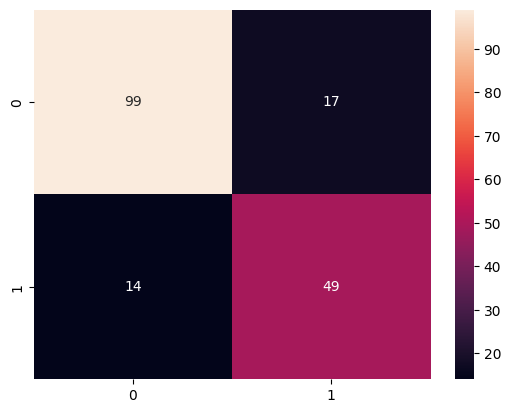

In [ ]:
predict = best_model.predict(X_test, prob = False)

sns.heatmap(Metrics.confusion_matrix(y_test, predict), annot=True, fmt="g")

Ньютон

In [ ]:
best_model = None
best_score = None
best_args = None

for epochs in [50, 100, 500, 1000, 2000]:
    print(f"\n\nTrain Newton model: ep {epochs}")
    model = LogisticRegression(newton=True)

    model.fit(
        X_train, y_train,
        epochs=epochs,
        verbose=False
    )
    predict = model.predict(X_test, prob = False)

    f1_score = Metrics.f1_score(y_test, predict)

    print("Accuracy:", Metrics.accuracy(y_test, predict))
    print("F1 score:", f1_score)

    if f1_score is not np.nan and (best_score is None or f1_score > best_score):
        best_score = f1_score
        best_model = model
        best_args = epochs


In [ ]:
print("Best model args - ", best_args, "score", best_score)

Best model args -  500 score 0.7751937984496123


<Axes: >

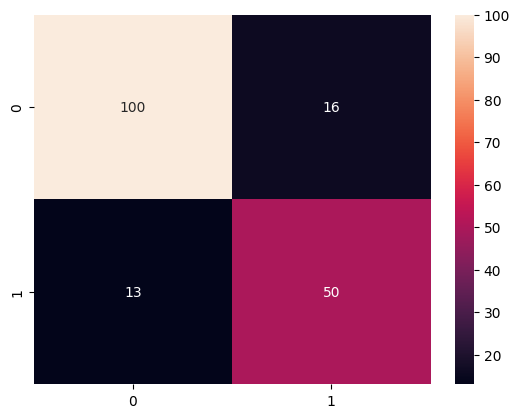

In [ ]:
predict = best_model.predict(X_test, prob = False)

sns.heatmap(Metrics.confusion_matrix(y_test, predict), annot=True, fmt="g")

In [ ]:
df_test_norm.isna().sum()

Pclass            0
Age               0
Fare              1
FamSize           0
Sex_male          0
Embarked_Q        0
Embarked_S        0
honorific_Miss    0
honorific_Mr      0
honorific_Mrs     0
dtype: int64

In [ ]:
# predictions for test

print(best_model.predict(df_test_norm, prob = False)[:, 0])

[ 0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.
  0.  1.  0.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.
  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.  1.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0. nan  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.
  0.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1